### 2 Consuma a API disponível https://makeup-api.herokuapp.com/api/v1/products.json, armazene os dados em um DataFrame e faça as seguintes operações:

In [1]:
import re
import json
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('https://makeup-api.herokuapp.com/api/v1/products.json')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  931 non-null    int64              
 1   brand               919 non-null    object             
 2   name                931 non-null    object             
 3   price               917 non-null    float64            
 4   price_sign          368 non-null    object             
 5   currency            368 non-null    object             
 6   image_link          931 non-null    object             
 7   product_link        931 non-null    object             
 8   website_link        931 non-null    object             
 9   description         930 non-null    object             
 10  rating              340 non-null    float64            
 11  category            517 non-null    object             
 12  product_type        931 non-null    

,id,brand,name,price,price_sign,currency,image_link,product_link,website_link,description,rating,category,product_type,tag_list,created_at,updated_at,product_api_url,api_featured_image,product_colors
0,1048,colourpop,Lippie Pencil,5.0,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/co...,https://colourpop.com/collections/lippie-pencil,https://colourpop.com,Lippie Pencil A long-wearing and high-intensit...,NaN,pencil,lip_liner,"[cruelty free, Vegan]",2018-07-08 23:45:08.056000+00:00,2018-07-09 00:53:23.301000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#B28378', 'colour_name': 'BFF ..."
1,1047,colourpop,Blotted Lip,5.5,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/pr...,https://colourpop.com/collections/lippie-stix?...,https://colourpop.com,Blotted Lip Sheer matte lipstick that creates ...,NaN,lipstick,lipstick,"[cruelty free, Vegan]",2018-07-08 22:01:20.178000+00:00,2018-07-09 00:53:23.287000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#b72227', 'colour_name': 'Bee'..."
2,1046,colourpop,Lippie Stix,5.5,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/co...,https://colourpop.com/collections/lippie-stix,https://colourpop.com,"Lippie Stix Formula contains Vitamin E, Mango,...",NaN,lipstick,lipstick,"[cruelty free, Vegan]",2018-07-08 21:47:49.858000+00:00,2018-07-09 00:53:23.274000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#F2DEC3', 'colour_name': 'Fair..."
3,1045,colourpop,No Filter Foundation,12.0,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/pr...,https://colourpop.com/products/no-filter-matte...,https://colourpop.com/products/no-filter-matte...,"Developed for the Selfie Age, our buildable fu...",NaN,liquid,foundation,"[cruelty free, Vegan]",2018-07-08 18:22:25.273000+00:00,2018-07-09 00:53:23.313000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#F2DEC3', 'colour_name': 'Fair..."
4,1044,boosh,Lipstick,26.0,$,CAD,https://cdn.shopify.com/s/files/1/1016/3243/pr...,https://www.boosh.ca/collections/all,https://www.boosh.ca/,All of our products are free from lead and hea...,NaN,lipstick,lipstick,"[Chemical Free, Organic]",2018-07-08 17:32:28.088000+00:00,2018-09-02 22:52:06.669000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#CB4975', 'colour_name': 'Babs..."


#### 2.1 Filtre apenas os produtos com a categoria lipstick.

In [3]:
df_lipstick = df.loc[df.category == 'lipstick']
print(df_lipstick.info())
df_lipstick.head()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 1 to 876
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  122 non-null    int64              
 1   brand               122 non-null    object             
 2   name                122 non-null    object             
 3   price               121 non-null    float64            
 4   price_sign          64 non-null     object             
 5   currency            64 non-null     object             
 6   image_link          122 non-null    object             
 7   product_link        122 non-null    object             
 8   website_link        122 non-null    object             
 9   description         122 non-null    object             
 10  rating              37 non-null     float64            
 11  category            122 non-null    object             
 12  product_type        122 non-null    objec

,id,brand,name,price,price_sign,currency,image_link,product_link,website_link,description,rating,category,product_type,tag_list,created_at,updated_at,product_api_url,api_featured_image,product_colors
1,1047,colourpop,Blotted Lip,5.5,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/pr...,https://colourpop.com/collections/lippie-stix?...,https://colourpop.com,Blotted Lip Sheer matte lipstick that creates ...,NaN,lipstick,lipstick,"[cruelty free, Vegan]",2018-07-08 22:01:20.178000+00:00,2018-07-09 00:53:23.287000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#b72227', 'colour_name': 'Bee'..."
2,1046,colourpop,Lippie Stix,5.5,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/co...,https://colourpop.com/collections/lippie-stix,https://colourpop.com,"Lippie Stix Formula contains Vitamin E, Mango,...",NaN,lipstick,lipstick,"[cruelty free, Vegan]",2018-07-08 21:47:49.858000+00:00,2018-07-09 00:53:23.274000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#F2DEC3', 'colour_name': 'Fair..."
4,1044,boosh,Lipstick,26.0,$,CAD,https://cdn.shopify.com/s/files/1/1016/3243/pr...,https://www.boosh.ca/collections/all,https://www.boosh.ca/,All of our products are free from lead and hea...,NaN,lipstick,lipstick,"[Chemical Free, Organic]",2018-07-08 17:32:28.088000+00:00,2018-09-02 22:52:06.669000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#CB4975', 'colour_name': 'Babs..."
19,1029,nudus,Amalia,0.0,$,USD,https://www.purpicks.com/wp-content/uploads/20...,https://www.purpicks.com/product/nudus-amalia/,https://purpicks.com/,"named after my beautiful mum, delicately pink ...",NaN,lipstick,lipstick,[purpicks],2018-06-30 19:19:31.441000+00:00,2018-09-02 22:52:06.839000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#7C524F', 'colour_name': '27 K..."
25,1023,marienatie,Lipstick,0.0,$,USD,https://www.purpicks.com/wp-content/uploads/cs...,https://www.purpicks.com/product/marie-natie-l...,https://purpicks.com/,A pure and creamy lipstick by MarieNatie formu...,NaN,lipstick,lipstick,"[purpicks, Vegan, Gluten Free, CertClean]",2018-06-30 19:19:31.034000+00:00,2018-09-02 22:52:06.510000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#9D5E4F', 'colour_name': 'Evel..."


#### 2.2 Liste as categorias (category) exclusivas presentes no DataFrame.

In [4]:
# considerando que não válidas apenas categorias diferentes de "" e de None
all_categories = df.category.unique()
valid_categories = all_categories[(all_categories != "") & (all_categories != None)]
print("Categorias:")
print(", ".join(sorted(list(valid_categories))))

Categorias:
bb_cc, concealer, contour, cream, gel, highlighter, lip_gloss, lip_stain, lipstick, liquid, mineral, palette, pencil, powder


#### 2.3 Crie uma função chamada buscar_produtos, passando como parâmetro qual a categoria e retorne a lista de produtos daquela categoria. Utilize a função para categoria pencil.

In [5]:
def buscar_produtos(df, category):
    return df[df.category == category]

df_pencil = buscar_produtos(df, 'pencil')
print(df_pencil.info())
df_pencil.head()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 742
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  62 non-null     int64              
 1   brand               61 non-null     object             
 2   name                62 non-null     object             
 3   price               60 non-null     float64            
 4   price_sign          17 non-null     object             
 5   currency            17 non-null     object             
 6   image_link          62 non-null     object             
 7   product_link        62 non-null     object             
 8   website_link        62 non-null     object             
 9   description         62 non-null     object             
 10  rating              29 non-null     float64            
 11  category            62 non-null     object             
 12  product_type        62 non-null     object

,id,brand,name,price,price_sign,currency,image_link,product_link,website_link,description,rating,category,product_type,tag_list,created_at,updated_at,product_api_url,api_featured_image,product_colors
0,1048,colourpop,Lippie Pencil,5.0,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/co...,https://colourpop.com/collections/lippie-pencil,https://colourpop.com,Lippie Pencil A long-wearing and high-intensit...,NaN,pencil,lip_liner,"[cruelty free, Vegan]",2018-07-08 23:45:08.056000+00:00,2018-07-09 00:53:23.301000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#B28378', 'colour_name': 'BFF ..."
28,1020,marienatie,Eyeliner,0.0,$,USD,https://www.purpicks.com/wp-content/uploads/cs...,https://www.purpicks.com/product/marie-natie-e...,https://purpicks.com/,An eyeliner that offers long lasting colour an...,NaN,pencil,eyeliner,"[purpicks, CertClean]",2018-06-30 19:19:30.847000+00:00,2018-09-02 22:52:06.484000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#000000', 'colour_name': 'Blac..."
29,1019,maia's mineral galaxy,Mineral Eye Brow Liner Charcoal Brown,0.0,$,USD,https://www.purpicks.com/wp-content/uploads/20...,https://www.purpicks.com/product/maias-mineral...,https://purpicks.com/,,NaN,pencil,eyebrow,"[EWG Verified, purpicks]",2018-06-30 19:19:30.782000+00:00,2018-09-02 22:52:06.474000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#5B4439', 'colour_name': 'Char..."
41,1007,c'est moi,Luminary Lip Crayon,0.0,$,USD,https://www.purpicks.com/wp-content/uploads/20...,https://www.purpicks.com/product/luminary-lip-...,https://purpicks.com/,These nourishing and creamy lip crayons come i...,NaN,pencil,lip_liner,"[EWG Verified, purpicks, Hypoallergenic, No Talc]",2018-06-30 19:19:29.975000+00:00,2018-09-02 22:52:06.545000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#B89093', 'colour_name': 'Fres..."
42,1006,c'est moi,Fearless Eyeliner,0.0,$,USD,https://www.purpicks.com/wp-content/uploads/20...,https://www.purpicks.com/product/fearless-eyel...,https://purpicks.com/,Make eyes pop with this velvety smooth eyeline...,NaN,pencil,eyeliner,"[EWG Verified, purpicks, Hypoallergenic, No Talc]",2018-06-30 19:19:29.910000+00:00,2018-09-02 22:52:06.537000+00:00,https://makeup-api.herokuapp.com/api/v1/produc...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#B8A89A', 'colour_name': 'Fear..."


#### 2.4 Utilize expressão regular Regex para trabalhar o formato do campo "created_at" exemplo de dado: "2018-07-08T23:45:08.056Z" e transformar para o formato dd/mm/yyyy hh:mm ou utilize um outro exemplo com expressão regular.

In [6]:
# criando uma coluna com o formato ISO 8601, como o exemplo dado na questão 2.4
df['iso_created_at'] = df['created_at'].apply(lambda x: x.to_pydatetime().isoformat() + 'Z')
df[['created_at', 'iso_created_at']].head()

,created_at,iso_created_at
0,2018-07-08 23:45:08.056000+00:00,2018-07-08T23:45:08.056000+00:00Z
1,2018-07-08 22:01:20.178000+00:00,2018-07-08T22:01:20.178000+00:00Z
2,2018-07-08 21:47:49.858000+00:00,2018-07-08T21:47:49.858000+00:00Z
3,2018-07-08 18:22:25.273000+00:00,2018-07-08T18:22:25.273000+00:00Z
4,2018-07-08 17:32:28.088000+00:00,2018-07-08T17:32:28.088000+00:00Z


In [7]:
# função que converte data em formato ISO 8601 para o formato "dd/mm/yyyy hh:mm:ss"
def iso8601_to_DMY_HMS(iso_date):
    pattern = r'(\d{4})-(\d{2})-(\d{2})T(\d{2}):(\d{2}):(\d{2})'
    match = re.match(pattern, iso_date)
    
    if match:
        year, month, day, hour, minute, second = match.groups()
        
        dmy_hms_date = f"{day}/{month}/{year} {hour}:{minute}:{second}"
        return dmy_hms_date


df['str_created_at'] = df['iso_created_at'].apply(lambda x: iso8601_to_DMY_HMS(x))
df[['created_at', 'iso_created_at', 'str_created_at']].head()

,created_at,iso_created_at,str_created_at
0,2018-07-08 23:45:08.056000+00:00,2018-07-08T23:45:08.056000+00:00Z,08/07/2018 23:45:08
1,2018-07-08 22:01:20.178000+00:00,2018-07-08T22:01:20.178000+00:00Z,08/07/2018 22:01:20
2,2018-07-08 21:47:49.858000+00:00,2018-07-08T21:47:49.858000+00:00Z,08/07/2018 21:47:49
3,2018-07-08 18:22:25.273000+00:00,2018-07-08T18:22:25.273000+00:00Z,08/07/2018 18:22:25
4,2018-07-08 17:32:28.088000+00:00,2018-07-08T17:32:28.088000+00:00Z,08/07/2018 17:32:28


In [8]:
# Obs.: A conversão dos valores da coluna "create_at" para o formato "dd/mm/yyyy hh:mm:ss"
# poderia ser direta. Só foi feita utilizando o módulo "re" para atender o pedido da questão.
# Segue abaixo a conversão direta:
df['str_direct_created_at'] = df['created_at'].dt.strftime('%d/%m/%Y %H:%M:%S')
df[['created_at', 'iso_created_at', 'str_created_at', 'str_direct_created_at']].head()

,created_at,iso_created_at,str_created_at,str_direct_created_at
0,2018-07-08 23:45:08.056000+00:00,2018-07-08T23:45:08.056000+00:00Z,08/07/2018 23:45:08,08/07/2018 23:45:08
1,2018-07-08 22:01:20.178000+00:00,2018-07-08T22:01:20.178000+00:00Z,08/07/2018 22:01:20,08/07/2018 22:01:20
2,2018-07-08 21:47:49.858000+00:00,2018-07-08T21:47:49.858000+00:00Z,08/07/2018 21:47:49,08/07/2018 21:47:49
3,2018-07-08 18:22:25.273000+00:00,2018-07-08T18:22:25.273000+00:00Z,08/07/2018 18:22:25,08/07/2018 18:22:25
4,2018-07-08 17:32:28.088000+00:00,2018-07-08T17:32:28.088000+00:00Z,08/07/2018 17:32:28,08/07/2018 17:32:28


#### 2.5 Exporte o DataFrame filtrado para o formato .json.

In [9]:
df_pencil.to_json("pencil_products.json", orient='records')

#### 2.6 Crie um gráfico de barras mostrando as 10 marcas (‘brand’) com mais produtos do tipo lipstick

In [10]:
series_brand_count = df_lipstick.groupby('brand')['id'].count()
df_brand_count = series_brand_count.reset_index()

df_brand_top_10 = df_brand_count.nlargest(10, 'id')
df_brand_top_10.head()

,brand,id
23,nyx,32
6,clinique,16
11,dior,12
26,revlon,9
16,l'oreal,7


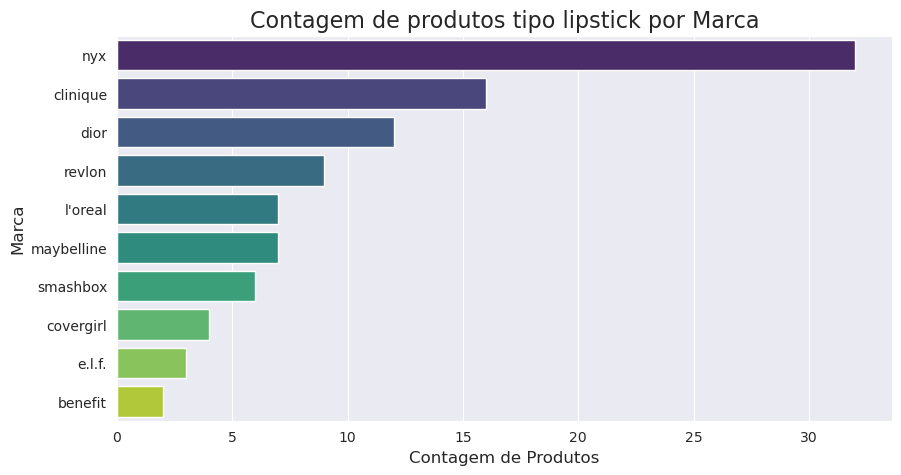

In [11]:
sns.set_style("darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(data=df_brand_top_10, x='id', y='brand', hue='brand', palette='viridis')

plt.title('Contagem de produtos tipo lipstick por Marca', fontsize=16)
plt.xlabel('Contagem de Produtos', fontsize=12)
plt.ylabel('Marca', fontsize=12)

# Exibindo o gráfico
plt.show()